In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Функция разделения выборки на тренировочную и тестовую

In [3]:
# Функция для подсчета метрик и создния матрицы ошибок
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_metrics_plot_confusion_matrix(clf, y_test, y_pred):
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

In [4]:
df = pd.read_csv('creditcard.csv', nrows=50000)
x = df.drop(columns='Class')
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=df.Class)

# Задача 1

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.91      0.89      0.90        44

    accuracy                           1.00     15000
   macro avg       0.95      0.94      0.95     15000
weighted avg       1.00      1.00      1.00     15000



In [6]:
from sklearn.ensemble import BaggingClassifier # Беггинг

clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_samples=0.5)
clf.fit(x_train, y_train) # Обучаем
y_pred = clf.predict(x_test) # Тестируем
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.86      0.86      0.86        44

    accuracy                           1.00     15000
   macro avg       0.93      0.93      0.93     15000
weighted avg       1.00      1.00      1.00     15000



In [7]:

from sklearn.ensemble import RandomForestClassifier # Cлучайный лес

clf = RandomForestClassifier(n_estimators=30,
                             max_depth=10,
                             max_features=2)
clf.fit(x_train, y_train) # Обучение
y_pred = clf.predict(x_test) # Тестирование
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.95      0.84      0.89        44

    accuracy                           1.00     15000
   macro avg       0.97      0.92      0.95     15000
weighted avg       1.00      1.00      1.00     15000



# Задача 2

Fitting 5 folds for each of 3 candidates, totalling 15 fits
RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=50,
                       n_jobs=-1, random_state=42)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.93      0.89      0.91        44

    accuracy                           1.00     15000
   macro avg       0.96      0.94      0.95     15000
weighted avg       1.00      1.00      1.00     15000



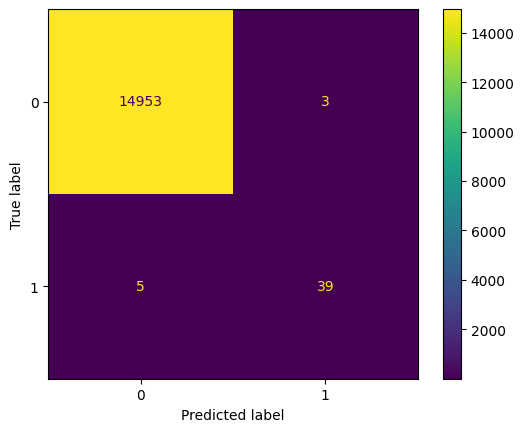

In [8]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(bootstrap=False, random_state=42, n_jobs=-1, criterion='entropy')

# Задаем словарь для перебора значений парамтеров
params = {'n_estimators': [10, 50, 100]}

clf = GridSearchCV(rfc, params, scoring='f1_weighted', verbose=50, n_jobs=-1)
clf.fit(x_train, y_train)

best_clf = clf.best_estimator_
print(best_clf)

# Метрики результата предсказания
y_pred = best_clf.predict(x_test)  # Выходы на тестовом наборе
# Найдем значения метрик:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 30
[LightGBM] [Info] Start training from score -0.002976
[LightGBM] [Info] Start training from score -5.818712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.81      0.86      0.84        44

    accuracy                           1.00     15000
   macro avg       0.90      0.93      0.92     15000
weighted avg       1.00      1.00      1.00     15000



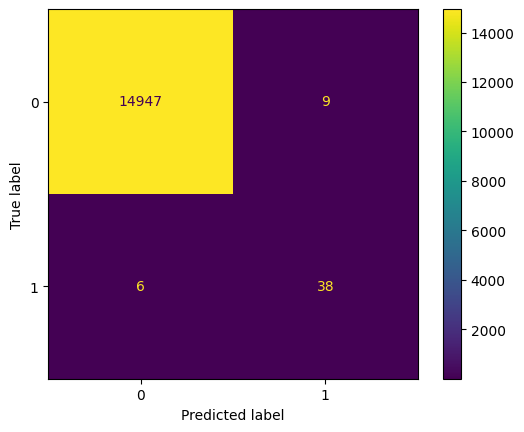

In [9]:
import lightgbm as lgb  # Имполрт библиотеки

clf = lgb.LGBMClassifier(objective="multiclass", n_estimators=7, num_classes=2)  # Создание модели
clf.fit(x_train, y_train)  # Обучение
y_pred = clf.predict(x_test) # Предсказание классов тестовых данных
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

# Задача 3

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.90      0.86      0.88        44

    accuracy                           1.00     15000
   macro avg       0.95      0.93      0.94     15000
weighted avg       1.00      1.00      1.00     15000



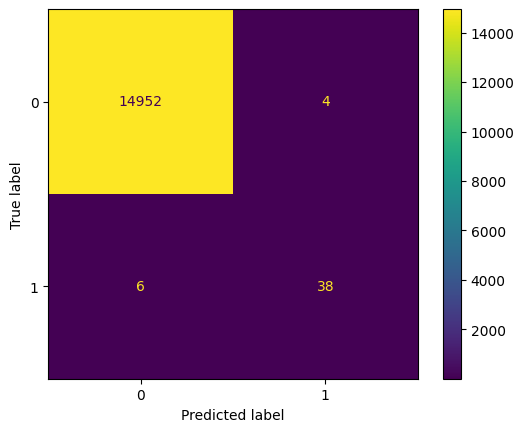

In [ ]:
from sklearn.ensemble import StackingClassifier

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost # подключим библиотеку XGboost

estimators = [('RandomForestClassifier', RandomForestClassifier(n_estimators=10,
                             max_depth=10,
                             max_features=2)),
              ('XGBClassifier', xgboost.XGBClassifier()),
              ('Tree', DecisionTreeClassifier(max_depth=5))]

clf = StackingClassifier(estimators=estimators)
clf.fit(x_train, y_train)  # Обучение
y_pred = clf.predict(x_test) # Предсказание классов тестовых данных
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)